# Healthcare Analytics EDA and Prediction

## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data_dictionary = pd.read_excel("Data_Dictionary.xlsx")

patient_profile = pd.read_csv("Patient_Profile.csv")
health_camp_details = pd.read_csv("Health_Camp_Detail.csv")

first_health_camp = pd.read_csv("First_Health_Camp_Attended.csv")
second_health_camp = pd.read_csv("Second_Health_Camp_Attended.csv")
third_health_camp = pd.read_csv("Third_Health_Camp_Attended.csv")

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
data_dictionary

,Details of the Files
0,Health_Camp_Detail.csv – File containing Healt...
1,Train.csv – File containing registration detai...
2,Patient_Profile.csv – This file contains Patie...
3,First_Health_Camp_Attended.csv – This file con...
4,Second_Health_Camp_Attended.csv - This file co...
5,Third_Health_Camp_Attended.csv - This file con...
6,Test.csv – File containing registration detail...


In [4]:
first_health_camp.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [5]:
health_camp_details.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [6]:
patient_profile.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [7]:
second_health_camp.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [8]:
third_health_camp.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [9]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [10]:
patient_profile.describe()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared
count,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000
mean,507148.408338,0.022533,0.027077,0.021603,0.023543
std,12411.747993,0.148412,0.162311,0.145387,0.151623
min,485678.000000,0.000000,0.000000,0.000000,0.000000
25%,496393.000000,0.000000,0.000000,0.000000,0.000000
50%,507104.000000,0.000000,0.000000,0.000000,0.000000
75%,517882.000000,0.000000,0.000000,0.000000,0.000000
max,528657.000000,1.000000,1.000000,1.000000,1.000000


## Merging all data in one df

In [11]:
merged_details = pd.merge(right = patient_profile, left = first_health_camp, on="Patient_ID")
merged_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6218 entries, 0 to 6217
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         6218 non-null   int64  
 1   Health_Camp_ID     6218 non-null   int64  
 2   Donation           6218 non-null   int64  
 3   Health_Score       6218 non-null   float64
 4   Unnamed: 4         0 non-null      float64
 5   Online_Follower    6218 non-null   int64  
 6   LinkedIn_Shared    6218 non-null   int64  
 7   Twitter_Shared     6218 non-null   int64  
 8   Facebook_Shared    6218 non-null   int64  
 9   Income             6218 non-null   object 
 10  Education_Score    6218 non-null   object 
 11  Age                6218 non-null   object 
 12  First_Interaction  6218 non-null   object 
 13  City_Type          4451 non-null   object 
 14  Employer_Category  2300 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 777.2+ KB


In [12]:
merged_details = merged_details.merge(health_camp_details, on = "Health_Camp_ID" )
merged_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6218 entries, 0 to 6217
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         6218 non-null   int64  
 1   Health_Camp_ID     6218 non-null   int64  
 2   Donation           6218 non-null   int64  
 3   Health_Score       6218 non-null   float64
 4   Unnamed: 4         0 non-null      float64
 5   Online_Follower    6218 non-null   int64  
 6   LinkedIn_Shared    6218 non-null   int64  
 7   Twitter_Shared     6218 non-null   int64  
 8   Facebook_Shared    6218 non-null   int64  
 9   Income             6218 non-null   object 
 10  Education_Score    6218 non-null   object 
 11  Age                6218 non-null   object 
 12  First_Interaction  6218 non-null   object 
 13  City_Type          4451 non-null   object 
 14  Employer_Category  2300 non-null   object 
 15  Camp_Start_Date    6218 non-null   object 
 16  Camp_End_Date      6218 

In [13]:
merged_details = merged_details.merge(second_health_camp, on="Patient_ID")
merged_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5212 entries, 0 to 5211
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         5212 non-null   int64  
 1   Health_Camp_ID_x   5212 non-null   int64  
 2   Donation           5212 non-null   int64  
 3   Health_Score       5212 non-null   float64
 4   Unnamed: 4         0 non-null      float64
 5   Online_Follower    5212 non-null   int64  
 6   LinkedIn_Shared    5212 non-null   int64  
 7   Twitter_Shared     5212 non-null   int64  
 8   Facebook_Shared    5212 non-null   int64  
 9   Income             5212 non-null   object 
 10  Education_Score    5212 non-null   object 
 11  Age                5212 non-null   object 
 12  First_Interaction  5212 non-null   object 
 13  City_Type          4470 non-null   object 
 14  Employer_Category  2948 non-null   object 
 15  Camp_Start_Date    5212 non-null   object 
 16  Camp_End_Date      5212 

In [14]:
merged_details = merged_details.merge( third_health_camp ,on = "Patient_ID")
merged_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 5422 non-null   int64  
 1   Health_Camp_ID_x           5422 non-null   int64  
 2   Donation                   5422 non-null   int64  
 3   Health_Score               5422 non-null   float64
 4   Unnamed: 4                 0 non-null      float64
 5   Online_Follower            5422 non-null   int64  
 6   LinkedIn_Shared            5422 non-null   int64  
 7   Twitter_Shared             5422 non-null   int64  
 8   Facebook_Shared            5422 non-null   int64  
 9   Income                     5422 non-null   object 
 10  Education_Score            5422 non-null   object 
 11  Age                        5422 non-null   object 
 12  First_Interaction          5422 non-null   object 
 13  City_Type                  4782 non-null   objec

In [15]:
merged_details.head()

,Patient_ID,Health_Camp_ID_x,Donation,Health_Score,Unnamed: 4,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,...,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Health_Camp_ID_y,Health Score,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,494977,6560,20,0.097561,NaN,1,1,1,0,2,...,16-Aug-03,20-Aug-03,First,B,2,6536,0.673181,6578,5,3
1,494977,6560,20,0.097561,NaN,1,1,1,0,2,...,16-Aug-03,20-Aug-03,First,B,2,6536,0.673181,6527,2,1
2,494977,6560,20,0.097561,NaN,1,1,1,0,2,...,16-Aug-03,20-Aug-03,First,B,2,6555,0.615827,6578,5,3
3,494977,6560,20,0.097561,NaN,1,1,1,0,2,...,16-Aug-03,20-Aug-03,First,B,2,6555,0.615827,6527,2,1
4,494977,6585,60,0.733990,NaN,1,1,1,0,2,...,22-Nov-03,05-Dec-03,First,E,2,6536,0.673181,6578,5,3


In [16]:
merged_details.describe()

,Patient_ID,Health_Camp_ID_x,Donation,Health_Score,Unnamed: 4,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Category3,Health_Camp_ID_y,Health Score,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
count,5422.000000,5422.000000,5422.000000,5422.000000,0.0,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000
mean,507208.149023,6551.725378,32.880856,0.525072,NaN,0.175028,0.204168,0.164515,0.155293,1.991332,6536.001660,0.607178,6544.733678,3.329768,2.667650
std,12311.461570,17.691238,25.985824,0.281859,NaN,0.380026,0.403130,0.370776,0.362217,0.092708,10.987919,0.266534,22.747020,1.765143,1.580357
min,485720.000000,6524.000000,10.000000,0.001667,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,6523.000000,0.058993,6527.000000,0.000000,0.000000
25%,496138.000000,6538.000000,20.000000,0.296296,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,6529.000000,0.399373,6527.000000,2.000000,1.000000
50%,507904.000000,6543.000000,30.000000,0.549327,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,6534.000000,0.627865,6528.000000,3.000000,2.000000
75%,518043.000000,6570.000000,40.000000,0.756793,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,6549.000000,0.845597,6578.000000,5.000000,4.000000
max,528589.000000,6586.000000,280.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,2.000000,6555.000000,1.000000,6578.000000,7.000000,6.000000


In [17]:
merged_details.columns

Index(['Patient_ID', 'Health_Camp_ID_x', 'Donation', 'Health_Score',
       'Unnamed: 4', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3', 'Health_Camp_ID_y', 'Health Score', 'Health_Camp_ID',
       'Number_of_stall_visited', 'Last_Stall_Visited_Number'],
      dtype='object')

## Handling missing values

In [18]:
merged_details.isna().sum()

Patient_ID                      0
Health_Camp_ID_x                0
Donation                        0
Health_Score                    0
Unnamed: 4                   5422
Online_Follower                 0
LinkedIn_Shared                 0
Twitter_Shared                  0
Facebook_Shared                 0
Income                          0
Education_Score                 0
Age                             0
First_Interaction               0
City_Type                     640
Employer_Category            2042
Camp_Start_Date                 0
Camp_End_Date                   0
Category1                       0
Category2                       0
Category3                       0
Health_Camp_ID_y                0
Health Score                    0
Health_Camp_ID                  0
Number_of_stall_visited         0
Last_Stall_Visited_Number       0
dtype: int64

In [19]:
#percentage of missing values in each column
missing_percent = merged_details.isna().sum().sort_values(ascending=False)/len(merged_details)
missing_percent*100 

Unnamed: 4                   100.000000
Employer_Category             37.661380
City_Type                     11.803762
Patient_ID                     0.000000
Number_of_stall_visited        0.000000
Health_Camp_ID                 0.000000
Health Score                   0.000000
Health_Camp_ID_y               0.000000
Category3                      0.000000
Category2                      0.000000
Category1                      0.000000
Camp_End_Date                  0.000000
Camp_Start_Date                0.000000
First_Interaction              0.000000
Health_Camp_ID_x               0.000000
Age                            0.000000
Education_Score                0.000000
Income                         0.000000
Facebook_Shared                0.000000
Twitter_Shared                 0.000000
LinkedIn_Shared                0.000000
Online_Follower                0.000000
Health_Score                   0.000000
Donation                       0.000000
Last_Stall_Visited_Number      0.000000


#### dropping the column Unnamed: 4 since it contails all null value and filling the missing values of categorical column with mode value

In [20]:
merged_details.drop('Unnamed: 4', axis=1, inplace=True)

In [21]:
merged_details['City_Type'] = merged_details['City_Type'].fillna(merged_details['City_Type'].mode()[0])
merged_details['Employer_Category'] = merged_details['Employer_Category'].fillna(merged_details['Employer_Category'].mode()[0])

## Creating a dataset with only usefull columns

Since health score has two different columns (Health Score and Health_Score), will add them.

In [22]:
merged_details['health'] = merged_details['Health Score'] + merged_details['Health_Score']
merged_details['health']

0       0.770742
1       0.770742
2       0.713388
3       0.713388
4       1.407171
          ...   
5417    1.123530
5418    0.790967
5419    0.645555
5420    1.258338
5421    1.258338
Name: health, Length: 5422, dtype: float64

selecting only important columns that will give use meaningfull results

In [23]:
imp_col = ['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score',  'Income', 'Camp_Start_Date', 'Camp_End_Date', 'Health Score', 'Number_of_stall_visited']
merged_details[imp_col]

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Income,Camp_Start_Date,Camp_End_Date,Health Score,Number_of_stall_visited
0,494977,6578,20,0.097561,2,16-Aug-03,20-Aug-03,0.673181,5
1,494977,6527,20,0.097561,2,16-Aug-03,20-Aug-03,0.673181,2
2,494977,6578,20,0.097561,2,16-Aug-03,20-Aug-03,0.615827,5
3,494977,6527,20,0.097561,2,16-Aug-03,20-Aug-03,0.615827,2
4,494977,6578,60,0.733990,2,22-Nov-03,05-Dec-03,0.673181,5
...,...,...,...,...,...,...,...,...,...
5417,499996,6527,20,0.537037,None,13-May-05,21-May-05,0.586493,6
5418,495949,6527,30,0.037037,None,13-May-05,21-May-05,0.753930,3
5419,520328,6527,20,0.092593,None,13-May-05,21-May-05,0.552962,6
5420,517824,6578,20,0.648148,None,13-May-05,21-May-05,0.610190,3


important columns for predictions

In [24]:
imp_cols_pred = ['Donation', 'health',  'Income', 'Number_of_stall_visited', 'Employer_Category', 'City_Type']

Creating a separate dataframe of the columns selected in the imp_cols_pred list.

In [25]:
useful_details = merged_details[imp_cols_pred]
useful_details.head()

,Donation,health,Income,Number_of_stall_visited,Employer_Category,City_Type
0,20,0.770742,2,5,Transport,H
1,20,0.770742,2,2,Transport,H
2,20,0.713388,2,5,Transport,H
3,20,0.713388,2,2,Transport,H
4,60,1.407171,2,5,Transport,H


In [26]:
useful_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Donation                 5422 non-null   int64  
 1   health                   5422 non-null   float64
 2   Income                   5422 non-null   object 
 3   Number_of_stall_visited  5422 non-null   int64  
 4   Employer_Category        5422 non-null   object 
 5   City_Type                5422 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 296.5+ KB


In [27]:
useful_details.describe()

,Donation,health,Number_of_stall_visited
count,5422.000000,5422.000000,5422.000000
mean,32.880856,1.132249,3.329768
std,25.985824,0.407618,1.765143
min,10.000000,0.077326,0.000000
25%,20.000000,0.844802,2.000000
50%,30.000000,1.147704,3.000000
75%,40.000000,1.432447,5.000000
max,280.000000,1.985676,7.000000


## Visualizing the data

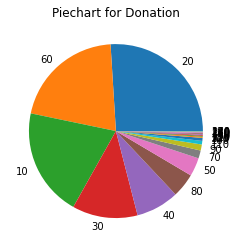

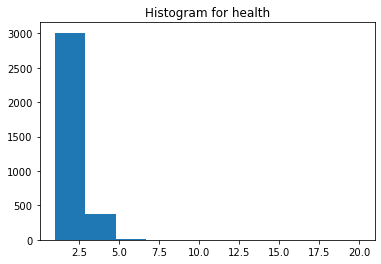

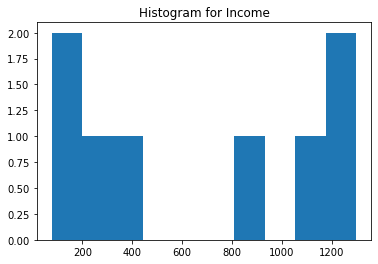

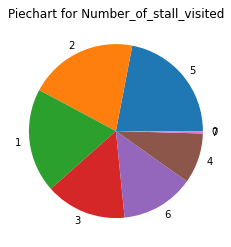

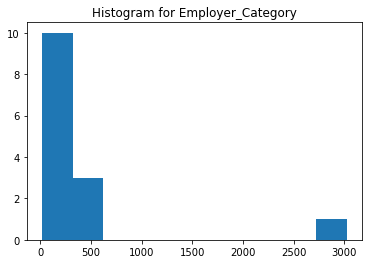

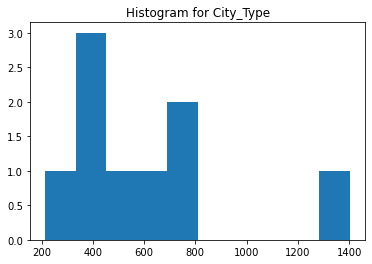

In [28]:
for col in useful_details.columns:
    if useful_details[col].dtype == 'int64':
        plt.pie(useful_details[col].value_counts(), labels=useful_details[col].unique())
        plt.title('Piechart for {}'.format(col))
        plt.show()
    else:
        plt.hist(useful_details[col].value_counts())
        plt.title('Histogram for {}'.format(col))
        plt.show();

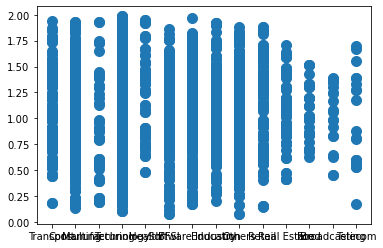

<Figure size 3600x2160 with 0 Axes>

In [29]:
plt.scatter(x=useful_details['Employer_Category'] , y=useful_details['health'], s =100)
plt.figure(figsize=(50,30));

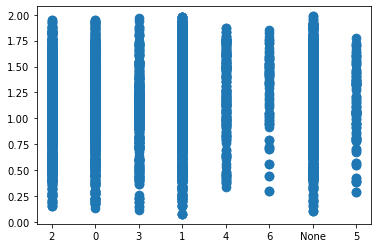

In [30]:
plt.scatter(x=useful_details['Income'], y=useful_details['health'], s = 75)

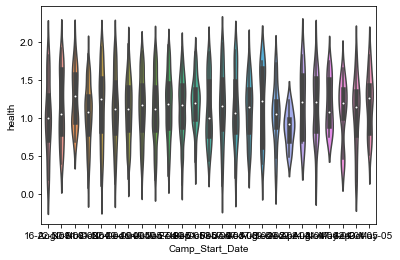

In [31]:
sns.violinplot(y = merged_details['health'], x = merged_details['Camp_Start_Date'] )
#sns.boxplot(y = merged_details['health'], x = merged_details['Camp_Start_Date'])
sns.set(rc={"figure.figsize":(20,4)})

## Inference of data

From the above visalisation of data, we can see that health score is not strongly dependent of the camp starting date as validated by the violinplot where barring one almost all violin plots had similar lengths and distributions.

The income-helth scatter plot shows high income patients tend to have a higher healthscore (as illustrated by the density of the scatterplot) whereas low income patients have densities distributed over a range of healthscore.

## Prediction

In [32]:
useful_details

,Donation,health,Income,Number_of_stall_visited,Employer_Category,City_Type
0,20,0.770742,2,5,Transport,H
1,20,0.770742,2,2,Transport,H
2,20,0.713388,2,5,Transport,H
3,20,0.713388,2,2,Transport,H
4,60,1.407171,2,5,Transport,H
...,...,...,...,...,...,...
5417,20,1.123530,None,6,Technology,D
5418,30,0.790967,None,3,Technology,G
5419,20,0.645555,None,6,Technology,H
5420,20,1.258338,None,3,Technology,D


In [33]:
merged_dumm = pd.get_dummies(useful_details, prefix=None, prefix_sep="_",drop_first=False)

In [34]:
X = merged_dumm.iloc[:,np.r_[0,2:]]
y=merged_dumm.health
X.shape

(5422, 3)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)